<a href="https://colab.research.google.com/github/Yashwanthreddy1789/machine-learning/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Check the actual column names
print(data.columns)

# Selecting only the necessary columns and renaming them
data = data[['v1', 'v2']]
data.columns = ['label', 'message']





Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [36]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Encode the labels: 0 for 'ham', 1 for 'spam'
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Features and labels
X = data['message']
y = data['label']

# Convert the text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)



label      0
message    0
dtype: int64


In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Define classifiers to train
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC()
}

# Initialize results storage
results = {}

# Train and evaluate each classifier
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store precision, recall, f1-score for the 'spam' class (label 1)
    results[model_name] = {
        "precision": report['1']['precision'],
        "recall": report['1']['recall'],
        "f1-score": report['1']['f1-score'],
        "support": report['1']['support']
    }



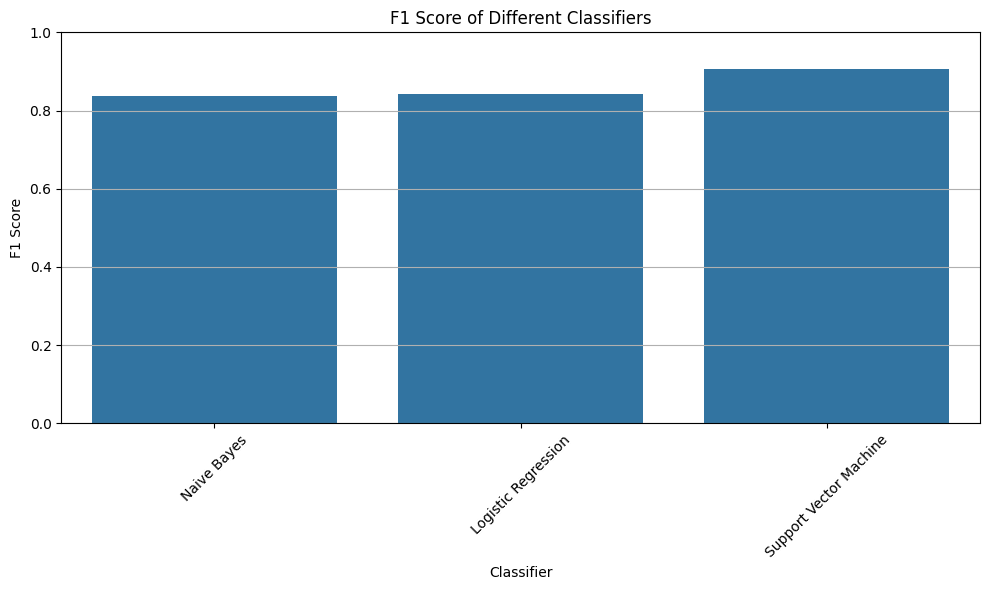

                        precision    recall  f1-score  support
Naive Bayes                   1.0  0.720000  0.837209    150.0
Logistic Regression           1.0  0.726667  0.841699    150.0
Support Vector Machine        1.0  0.826667  0.905109    150.0


In [38]:

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Visualize the F1 scores of different classifiers
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='f1-score', data=results_df)
plt.title('F1 Score of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# Print the results
print(results_df)
